    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [5]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
0 & 1 & 2 & 3 & 4 & 5\\ \hline
9.99 & 8.73 & 7.78 & 7.37 & 6.82 & 6.25
\\ \hline



    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from math import log as ln

In [2]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [3]:
m = list (map (int, input("m: ").split()))
z_kalib = list (map (float, input("z_kalib: ").split()))

k_kalib, b_kalib, sigma_k_kalib, sigma_b_kalib = MNK (m, z_kalib)
print (k_kalib, b_kalib, sigma_k_kalib, sigma_k_kalib, sep = '\n')

0.3311617647058823
2.678970588235294
0.0035247249825228247
0.0035247249825228247


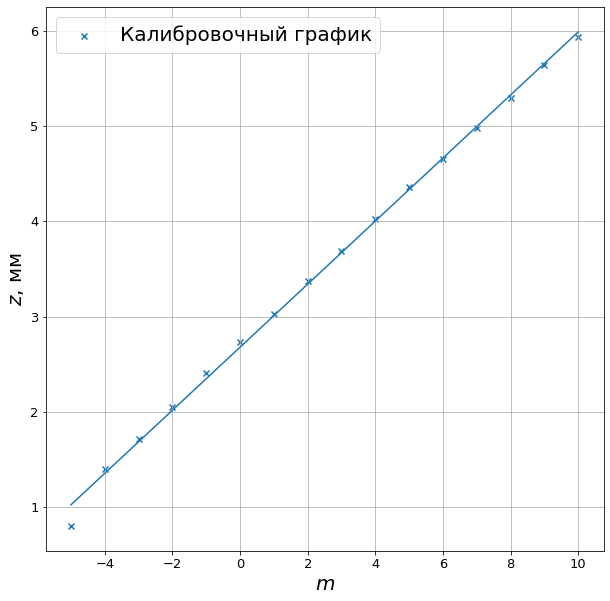

In [12]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

linear_kalib = lambda x: k_kalib * x + b_kalib

ax.scatter (m, z_kalib, marker = 'x', label = "Калибровочный график")
ax.plot ([m[0], m[-1]], [linear_kalib(m[0]), linear_kalib(m[-1])])

ax.set_xlabel('$m$', fontsize = 20)
ax.set_ylabel('$z$, мм',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/kalib.pdf")

In [15]:
z_press = list (map (float, input("z_press: ").split()))
dP = list (map (float, input("dp: ").split()))

# magic, мм. в. ст. -> Па
for i in range (len (dP)):
    dP[i] *= -10

lambd = 67 * pow (10, -8)
l = 0.1

dn = [(i_z_press - b_kalib) * lambd / k_kalib / l for i_z_press in z_press]
k_press, b_press, sigma_k_press, sigma_b_press = MNK (dP, dn)
print (k_press, b_press, sigma_k_press, sigma_b_press, sep = '\n')

2.9041835379416978e-09
7.863201233244666e-08
5.2948108902892676e-11
3.206167213372711e-07


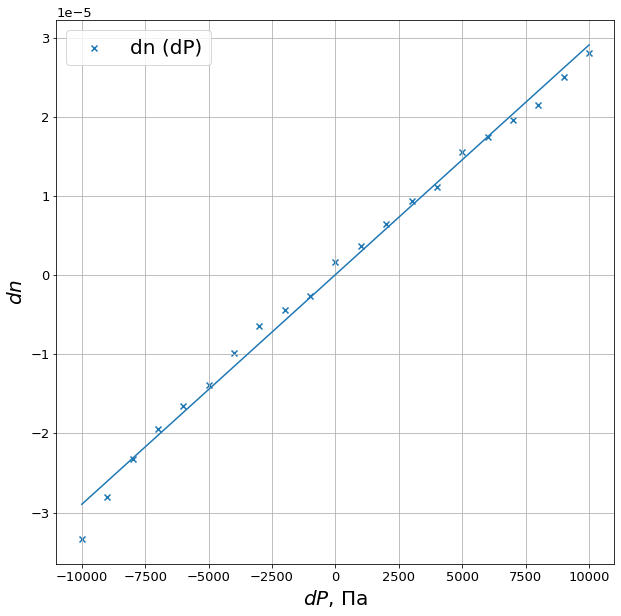

In [14]:
plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

linear_press = lambda x: k_press * x + b_press

ax.scatter (dP, dn, marker = 'x', label = "dn (dP)")
ax.plot ([dP[0], dP[-1]], [linear_press(dP[0]), linear_press(dP[-1])])

ax.set_xlabel('$dP$, Па', fontsize = 20)
ax.set_ylabel('$dn$',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/press.pdf")